In [1]:
#!/usr/bin/env python
# This was written by Levi Lentz for the Kolpak Group at MIT
# This is distributed under the MIT license
# Modified by QuantumNerd 13.Apr.2020
# Welcome to check out my tutorials: https://www.youtube.com/channel/UCgQPek4ZSo_yL7wEjIhxvfA
# use function bndplot() to plot the band

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import sys

#This function extracts the high symmetry points from the output of bandx.out
def Symmetries(fstring): 
  f = open(fstring,'r')
  x = np.zeros(0)
  for i in f:
    if "high-symmetry" in i:
      x = np.append(x,float(i.split()[-1]))
  f.close()
  return x
# This function takes in the datafile, the fermi energy, the symmetry file, a subplot, and the label
# It then extracts the band data, and plots the bands, the fermi energy in red, and the high symmetry points
def bndplot(datafile,fermi,symmetryfile,subplot,**kwargs):
  ## necessary:
  # datafile is the bands.dat.gnu file generated from band.x
  # fermi is the Fermi energy
  # symmetryfile is the standard output file of band.x (bands.pp.out)
  # subplot is the axes that you want to plot the band on

  ## optional:
  # use name_k_points=['L','G','X','U','G'] where G is Gamma point to label the high symmetry points. It must have the same length as the variable 'temp'
  # use shift_fermi=1 to shift the Fermi energy to zero
  # use color='black' to manually set the color of the band structure plot. Useful to plot two band structure together for comparison
  # use linestyle='dashed' to manually set the linestyle of the band structure plot. Useful to plot two band structure together for comparison
  # use range=[-5,5] to set the energy range for plotting the band structure
  # use legend='Si, PBE' to set the legend of the bands

  if 'shift_fermi' in kwargs:
    bool_shift_efermi = kwargs['shift_fermi']
  else:
    bool_shift_efermi = 0
  if 'color' in kwargs:
    color_bnd=kwargs['color']
  else:
    color_bnd='black'
  if 'linestyle' in kwargs:
    line_bnd=kwargs['linestyle']
  else:
    line_bnd='solid'
  
  z = np.loadtxt(datafile) #This loads the bandx.dat.gnu file
  x = np.unique(z[:,0]) #This is all the unique x-points
  bands = []
  bndl = len(z[z[:,0]==x[1]]) #This gives the number of bands in the calculation
  Fermi = float(fermi)
  if bool_shift_efermi:
    fermi_shift=Fermi
  else:
    fermi_shift=0
  axis = [min(x),max(x)]
  for i in range(0,bndl):
    bands.append(np.zeros([len(x),2])) #This is where we storre the bands
  for i in range(0,len(x)):
    sel = z[z[:,0] == x[i]]  #Here is the energies for a given x
    test = []
    for j in range(0,bndl): #This separates it out into a single band
      bands[j][i][0] = x[i]
      #bands[j][i][1] = np.multiply(sel[j][1],13.605698066)
      bands[j][i][1] = sel[j][1]
  for i in bands: #Here we plots the bands
    subplot.plot(i[:,0],i[:,1]-fermi_shift,color=color_bnd,linestyle=line_bnd)
  if 'legend' in kwargs:
    #empty plot to generate legend
    subplot.plot([None],[None],color=color_bnd,linestyle=line_bnd,label=kwargs['legend'])
  temp = Symmetries(symmetryfile)
  for j in temp: #This is the high symmetry lines
    x1 = [j,j]
    #x2 = [fermi-10,fermi+10]
    #subplot.plot(x1,x2,'--',lw=0.55,color='black',alpha=0.75)
    subplot.axvline(x=j,linestyle='dashed',color='black',alpha=0.75)
  subplot.plot([min(x),max(x)],[Fermi-fermi_shift,Fermi-fermi_shift],color='red',linestyle='dotted')
  subplot.set_xticks(temp)
  subplot.set_xticklabels([])
  if 'name_k_points' in kwargs:
    if len(kwargs['name_k_points'])==len(temp):
      subplot.set_xticklabels(kwargs['name_k_points'])
  if 'range' in kwargs:
    range_plot=kwargs['range']
    subplot.set_ylim([range_plot[0],range_plot[1]])
  subplot.set_xlim([axis[0],axis[1]])
  font = {'fontname':'Times New Roman'}
  # subplot.set_xlabel('wavevector k',fontsize=12, **font)
  subplot.set_ylabel('energy (eV)', fontsize=16, **font)
  if 'legend' in kwargs:
    subplot.legend()

In [2]:
path='/Users/adamsmith/Documents/GitHub/PH30036_AdamSmith/FYP/Ta2CH2/BANDS&DOS/bands_dos_results2'+'/'
material='Ta2CH2'
fermiE=-1.977

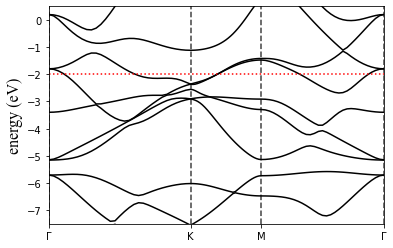

In [3]:

datafile=path+material+'.Bandx.dat.gnu'
# fermiE = -0.1709 # get from nscf / scf step out
symmetryfile=path+material+'.bandx.out'
bool_shift_efermi= True
fig, ax = plt.subplots()

#bndplot(datafile,fermi,symmetryfile,ax)
bndplot(datafile,fermiE,symmetryfile,ax,shift_fermi=0,\
color='black',linestyle='solid',name_k_points=['Γ','K','M','Γ'],range=[-7.5,0.5])

# plt.text(0.0, 4.5, 'Fermi energy = -0.2666', fontsize='small')

fig.savefig(material+"-BandsPlot.png")
plt.show()

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

In [5]:

# load data
energy, dos, idos = np.loadtxt(path+material+'.dos.dat', unpack=True)




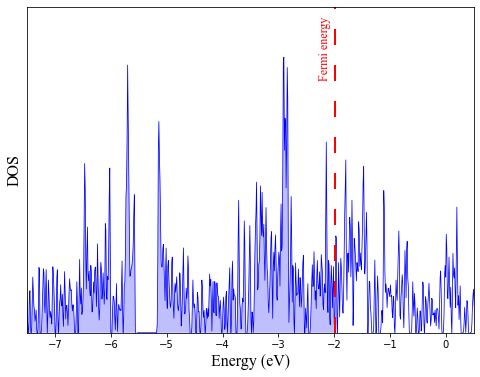

In [7]:
# fermiE=-0.1709
# make plot
plt.figure(figsize = (8, 6))
plt.plot(energy, dos, linewidth=0.75, color='blue')
plt.yticks([])
font = {'fontname':'Times New Roman'}
plt.xlabel('Energy (eV)',fontsize=16, **font)
plt.ylabel('DOS',fontsize=16, **font)
plt.axvline(x=fermiE, linewidth=2.0, color='red', linestyle=(0, (8, 10)))
plt.xlim(-7.5, 0.5)
plt.ylim(0, )
plt.fill_between(energy, 0, dos, where=(energy < fermiE), facecolor='blue', alpha=0.25)
plt.text(-0.3+fermiE, 12, 'Fermi energy', color='red',fontsize=12, rotation=90, **font)
plt.savefig(material+'-DOSplot.png')
plt.show()